# 3. Domácí úkol: Covid-19

In [1]:
using CSV, DataFrames, Dates, PyPlot

In [2]:
include("helpers.jl");

In [3]:
color_bg_all = "#495464"
color_bg_plot = "#222831"
color_text = "#ffffff"

PyPlot.matplotlib.style.use("ggplot")
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")

rcParams["font.family"] = "DejaVu Sans"
rcParams["figure.facecolor"] = color_bg_all
rcParams["grid.color"] = color_bg_all
rcParams["axes.edgecolor"] = color_bg_all
rcParams["axes.facecolor"] = color_bg_plot
rcParams["text.color"] = color_text
rcParams["xtick.color"] = color_text
rcParams["ytick.color"] = color_text;

In [4]:
df_overview = CSV.read(joinpath("data", "zakladni-prehled.csv"),       DataFrame)
df_tests    = CSV.read(joinpath("data", "testy-pcr-antigenni.csv"),    DataFrame)
df_hosp     = CSV.read(joinpath("data", "hospitalizace.csv"),          DataFrame)
df_hosp_vac = CSV.read(joinpath("data", "ockovani-hospitalizace.csv"), DataFrame)
df_deaths   = CSV.read(joinpath("data", "umrti_cr.csv"),               DataFrame);

Zadání úkolu je podrobně popsáno v souboru `README.adoc`.

----
## 1. Zpoždění vln (první tři vlny 2020/2021)

### Pozitivní PCR a antigenní testy

In [5]:
positive_tests = df_tests.PCR_pozit_asymp + df_tests.PCR_pozit_sympt;

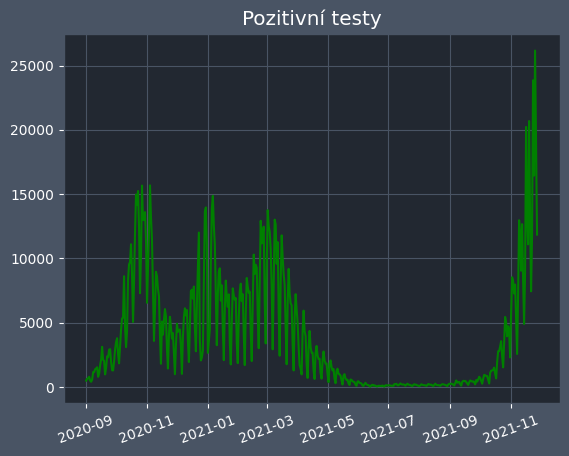

In [6]:
title("Pozitivní testy"); xticks(rotation=20)
plot(df_tests.datum, positive_tests, color="g");

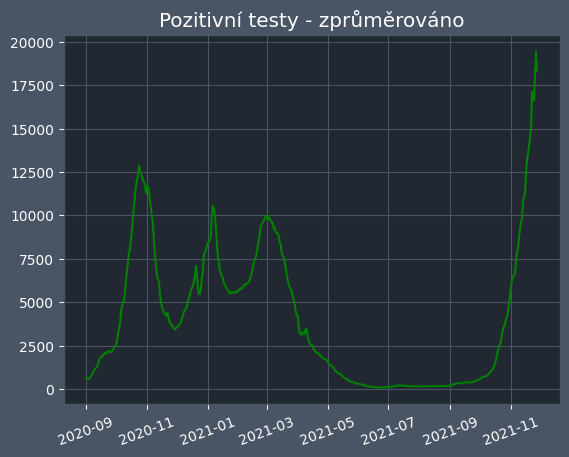

In [7]:
title("Pozitivní testy - zprůměrováno"); xticks(rotation=20)
plot( df_tests.datum, average(positive_tests), color="g" );

In [8]:
peaks_tests_avg = find_peaks( average(positive_tests), offset=40 )

println( "Maximum pozitivních za den:              ", maximum(positive_tests) )
println("------")
println( "Peaky v týd. průměru pozitivních za den: ", peaks_tests_avg )
println( "Hodnoty v peacích v průměru:             ", positive_tests[peaks_tests_avg] )

Maximum pozitivních za den:              26170
------
Peaky v týd. průměru pozitivních za den: Any[54, 128, 182, 452]
Hodnoty v peacích v průměru:             [12473, 14867, 9109, 18879]


In [9]:
println("Kompletní data ze dne s průměrně nejvíce pozitivních testů")
println("----------")

for name in names(df_tests)
    println( lpad(name, 42, ' '), ": ", df_tests[peaks_tests_avg[4], name] )
end

Kompletní data ze dne s průměrně nejvíce pozitivních testů
----------
                                        id: d0c49dbe-d2e3-4ed2-83d8-3e0dc3855ab4
                                     datum: 2021-11-26
                           pocet_PCR_testy: 98790
                            pocet_AG_testy: 26396
         typologie_test_indik_diagnosticka: 24472
      typologie_test_indik_epidemiologicka: 42106
          typologie_test_indik_preventivni: 55455
              typologie_test_indik_ostatni: 3153
                       incidence_pozitivni: 20344
   pozit_typologie_test_indik_diagnosticka: 9188
pozit_typologie_test_indik_epidemiologicka: 6474
    pozit_typologie_test_indik_preventivni: 4178
        pozit_typologie_test_indik_ostatni: 504
                           PCR_pozit_sympt: 10093
                           PCR_pozit_asymp: 8786
                             AG_pozit_symp: 970
                   AG_pozit_asymp_PCR_conf: 495


### Hospitalizovaní pacienti

In [10]:
hospitalised_count = df_hosp.pocet_hosp;

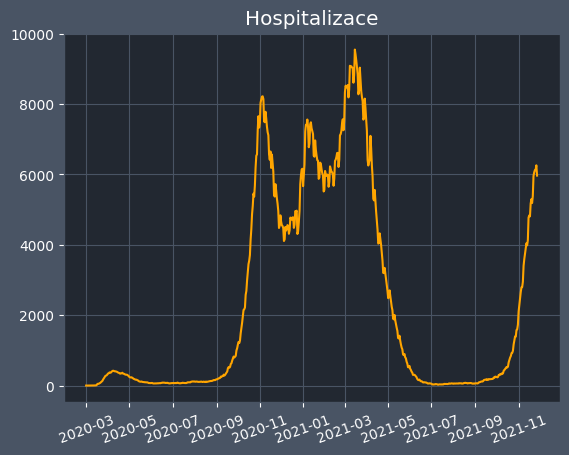

In [11]:
title("Hospitalizace"); xticks(rotation=20)
plot(df_hosp.datum, hospitalised_count, color="orange");

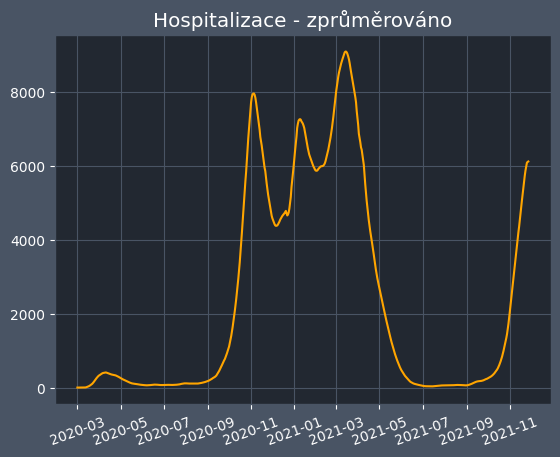

In [12]:
title("Hospitalizace - zprůměrováno"); xticks(rotation=20)
plot( df_hosp.datum, average(hospitalised_count), color="orange" );

In [13]:
peaks_hosp_avg = find_peaks( average(hospitalised_count), offset=40 )

println( "Maximum hospitalizovaných za den:              ", maximum(hospitalised_count) )
println("------")
println( "Peaky v týd. průměru hospitalizovaných za den: ", peaks_hosp_avg )
println( "Hodnoty v peacích v průměru:                   ", hospitalised_count[peaks_hosp_avg] )

Maximum hospitalizovaných za den:              9551
------
Peaky v týd. průměru hospitalizovaných za den: Any[250, 315, 379, 637]
Hodnoty v peacích v průměru:                   [8224, 6774, 8823, 5968]


In [14]:
println("Kompletní data ze dne s průměrně nejvíce hospitalizovanými")
println("----------")

for name in names(df_hosp)
    println( lpad(name, 42, ' '), ": ", df_hosp[peaks_hosp_avg[4], name] )
end

Kompletní data ze dne s průměrně nejvíce hospitalizovanými
----------
                                        id: 3a458770-d402-44a4-b831-4e1ffabbe0b1
                                     datum: 2021-11-27
                      pacient_prvni_zaznam: 362
                  kum_pacient_prvni_zaznam: 153522
                                pocet_hosp: 5968
                         stav_bez_priznaku: 483
                                stav_lehky: 1791
                              stav_stredni: 2746
                                stav_tezky: 948
                                       jip: 906
                                    kyslik: 2454
                                      hfno: 468
                                       upv: 442
                                      ecmo: 16
                            tezky_upv_ecmo: 949
                                     umrti: 44
                                 kum_umrti: 29317


### Úmrtí

In [15]:
death_count = df_hosp.umrti;

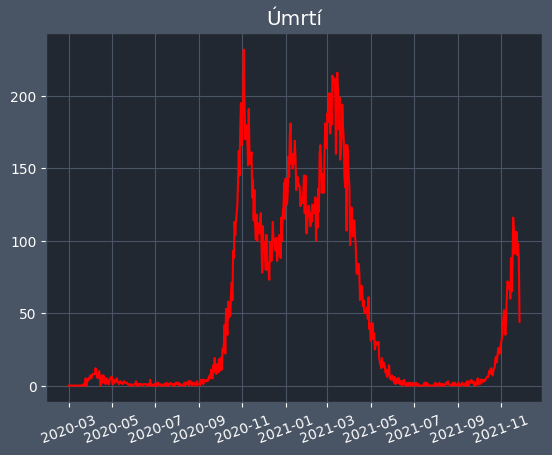

In [16]:
title("Úmrtí"); xticks(rotation=20)
plot(df_hosp.datum, death_count, color="r");

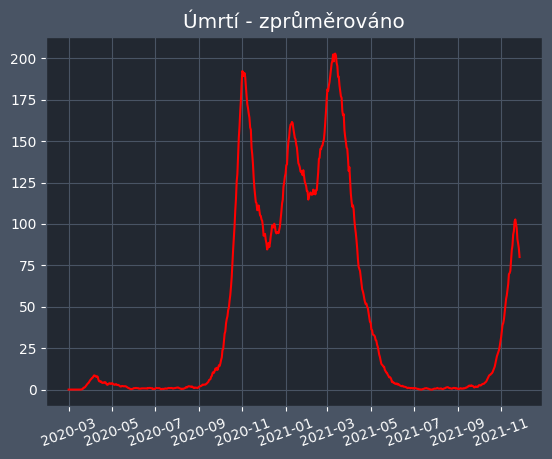

In [17]:
title("Úmrtí - zprůměrováno"); xticks(rotation=20)
plot( df_hosp.datum, average(death_count), color="r" );

In [18]:
peaks_deaths_avg = find_peaks( average(death_count), offset=40 )

println( "Maximum mrtvých za den:              ", maximum(death_count) )
println("------")
println( "Peaky v týd. průměru mrtvých za den: ", peaks_deaths_avg )
println( "Hodnoty v peacích v průměru:         ", death_count[peaks_deaths_avg] )

Maximum mrtvých za den:              232
------
Peaky v týd. průměru mrtvých za den: Any[37, 246, 316, 377, 631]
Hodnoty v peacích v průměru:         [8, 187, 160, 201, 106]


In [19]:
println("Kompletní data ze dne s průměrně nejvíce mrtvými")
println("----------")

for name in names(df_hosp)
    println( lpad(name, 42, ' '), ": ", df_hosp[peaks_deaths_avg[4], name] )
end

Kompletní data ze dne s průměrně nejvíce mrtvými
----------
                                        id: 541941de-f8e4-475b-b753-2e71a37f1d02
                                     datum: 2021-03-12
                      pacient_prvni_zaznam: 973
                  kum_pacient_prvni_zaznam: 107479
                                pocet_hosp: 9012
                         stav_bez_priznaku: 471
                                stav_lehky: 2111
                              stav_stredni: 4431
                                stav_tezky: 1999
                                       jip: 1833
                                    kyslik: 3885
                                      hfno: 1008
                                       upv: 930
                                      ecmo: 33
                            tezky_upv_ecmo: 1999
                                     umrti: 201
                                 kum_umrti: 20798


### Závěr

In [30]:
println("Testy:         ", peaks_tests_avg)
println("Hospitalizace: ", peaks_hosp_avg)
println("Úmrtí:         ", peaks_deaths_avg)
println()

d = Dict(1 => "První", 2 => "Druhá", 3 => "Třetí")

for i in 1:3
    date_test  = df_tests[peaks_tests_avg[i], :datum]
    date_hosp  = df_hosp[peaks_hosp_avg[i], :datum]
    date_death = df_hosp[peaks_deaths_avg[i+1], :datum]
    
    println("$(d[i]) vlna:\n-----------")
    println("Počet dní od peaku nakažených do peaku hospitalizovaných: ", date_hosp - date_test )
    println("Počet dní od peaku nakažených do peaku mrtvích:           ", date_death - date_test )
    println()
end

Testy:         Any[54, 128, 182, 452]
Hospitalizace: Any[250, 315, 379, 637]
Úmrtí:         Any[37, 246, 316, 377, 631]

První vlna:
-----------
Počet dní od peaku nakažených do peaku hospitalizovaných: 12 days
Počet dní od peaku nakažených do peaku mrtvích:           8 days

Druhá vlna:
-----------
Počet dní od peaku nakažených do peaku hospitalizovaných: 3 days
Počet dní od peaku nakažených do peaku mrtvích:           4 days

Třetí vlna:
-----------
Počet dní od peaku nakažených do peaku hospitalizovaných: 13 days
Počet dní od peaku nakažených do peaku mrtvích:           11 days



----
## 2. Hospitalizace očkovaných a neočkovaných pacientů

In [21]:
df_hosp_vac_limited = df_hosp_vac[ df_hosp_vac.datum .>= Date("2021-7-1"), : ]

hospitalized_vaccinated = df_hosp_vac_limited.hospitalizovani_dokoncene_ockovani +
                          df_hosp_vac_limited.hospitalizovani_nedokoncene_ockovani +
                          df_hosp_vac_limited.hospitalizovani_posilujici_davka

hospitalized_nonvaccinated = df_hosp_vac_limited.hospitalizovani_bez_ockovani

perc_vac = hospitalized_vaccinated / df_overview.ockovane_osoby_celkem[1] * 100

ccitizens = 10_701_777
perc_nonvac = hospitalized_nonvaccinated / (ccitizens .- df_overview.ockovane_osoby_celkem[1]) * 100

df_hosp_perc = DataFrame(datum=df_hosp_vac_limited.datum, proc_ockovani=perc_vac, proc_neockovani=perc_nonvac)

,datum,proc_ockovani,proc_neockovani
,Date,Float64,Float64
1,2021-07-01,0.0,9.80331e-5
2,2021-07-02,0.0,4.90166e-5
3,2021-07-03,0.0,4.90166e-5
4,2021-07-04,3.02045e-5,2.45083e-5
5,2021-07-05,1.51023e-5,2.45083e-5
6,2021-07-06,0.0,0.0
7,2021-07-07,1.51023e-5,0.000171558
8,2021-07-08,3.02045e-5,4.90166e-5
9,2021-07-09,1.51023e-5,9.80331e-5


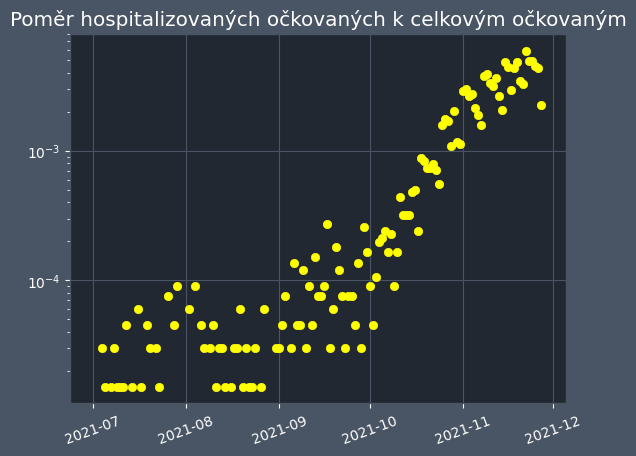

In [22]:
title("Poměr hospitalizovaných očkovaných k celkovým očkovaným"); xticks(rotation=20)
yscale("log")
scatter( df_hosp_perc.datum, df_hosp_perc.proc_ockovani, color="yellow" );

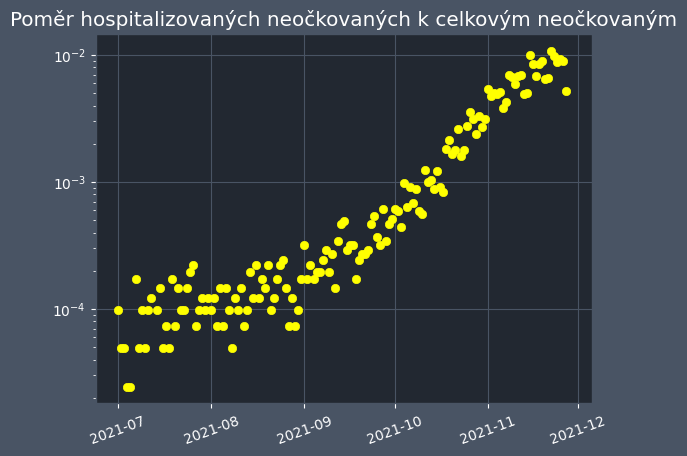

In [23]:
title("Poměr hospitalizovaných neočkovaných k celkovým neočkovaným"); xticks(rotation=20)
yscale("log")
scatter( df_hosp_perc.datum, df_hosp_perc.proc_neockovani, color="yellow" );